In [103]:
import pandas as pd

In [104]:
import numpy as np

In [105]:
df = pd.read_csv("Book1.csv", header = 0, parse_dates=[0])

In [106]:
df.tail()

,Date,Price,reverse
392,2021-08-04,"2,725.29",5
393,2021-08-05,"2,827.21",4
394,2021-08-06,"2,889.43",3
395,2021-08-07,"3,158.00",2
396,2021-08-08,"3,131.31",1


In [107]:
df.Price = df.Price.str.replace(',', '').astype(float)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     397 non-null    datetime64[ns]
 1   Price    397 non-null    float64       
 2   reverse  397 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.4 KB


In [109]:
df.head()

,Date,Price,reverse
0,2020-07-08,246.99,397
1,2020-07-09,242.02,396
2,2020-07-10,241.26,395
3,2020-07-11,239.20,394
4,2020-07-12,242.75,393


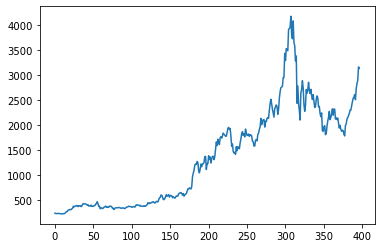

In [110]:
df['Price'].plot()

In [111]:
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df['Price'])

In [112]:
# H0: it is non-stationary
# H1: it is stationary

def adfuller_test(Price):
    result=adfuller(Price)
    lables = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, lables):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("stationary")
    else:
        print("non-stationary")
        

In [113]:
adfuller_test(df['Price'])

ADF Test Statistic : -0.511136584258887
p-value : 0.8898248836244957
#Lags Used : 16
Number of Observations Used : 380
non-stationary


In [114]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [115]:
import matplotlib.pyplot as plt

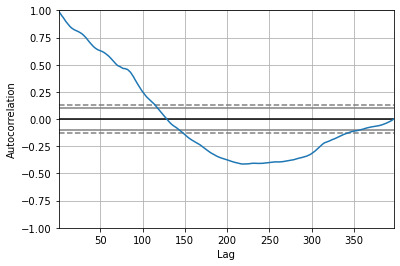

In [116]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])

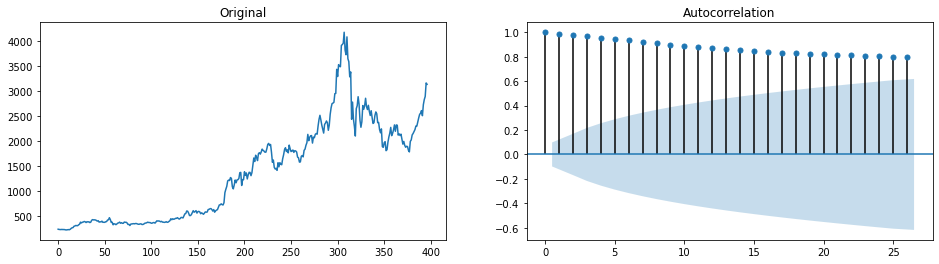

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Price)
ax1.set_title('Original')
plot_acf(df.Price, ax=ax2);

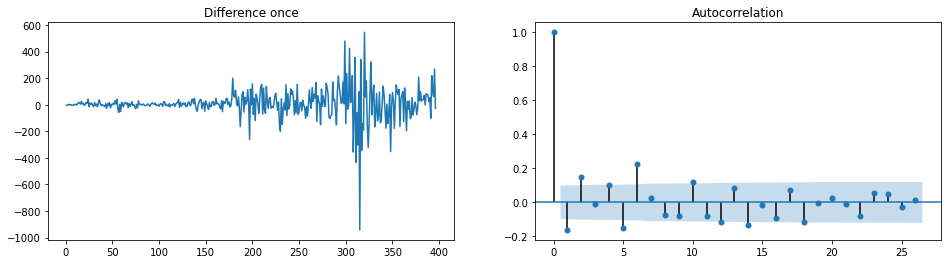

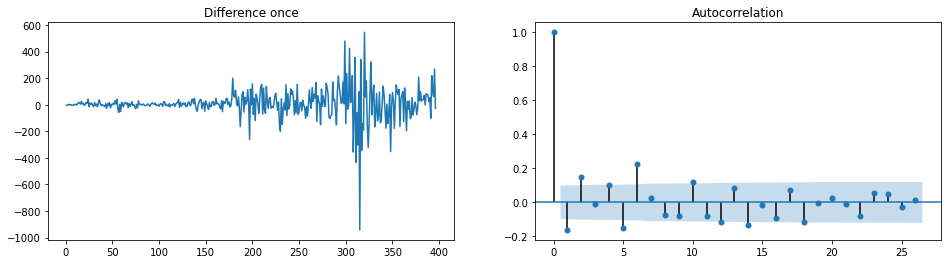

In [118]:
diff = df.Price.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference once')
plot_acf(diff, ax=ax2)

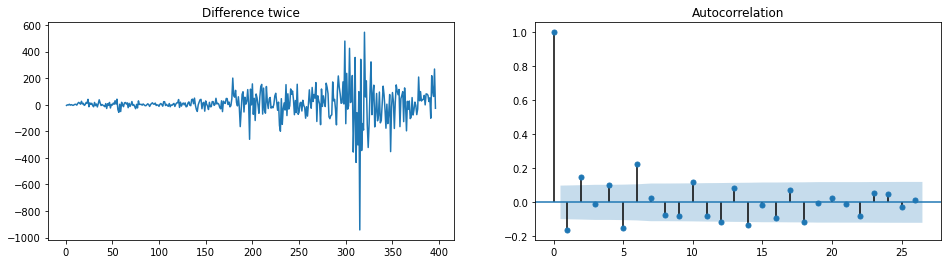

In [123]:
diff = df.Price.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference twice')
plot_acf(diff, ax=ax2);

In [120]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Price,test='adf')

1

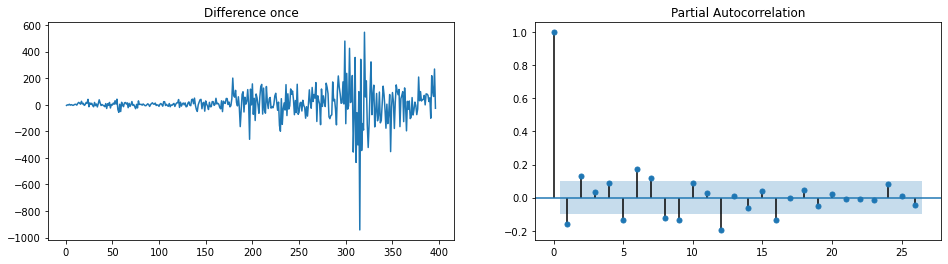

In [122]:
diff = df.Price.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference once')
plot_pacf(diff, ax=ax2);

p=1,
so at this point with the help of PACF graph we can see that the lag value should be 1 because from 2 the value is beneith 95% confidence mark.

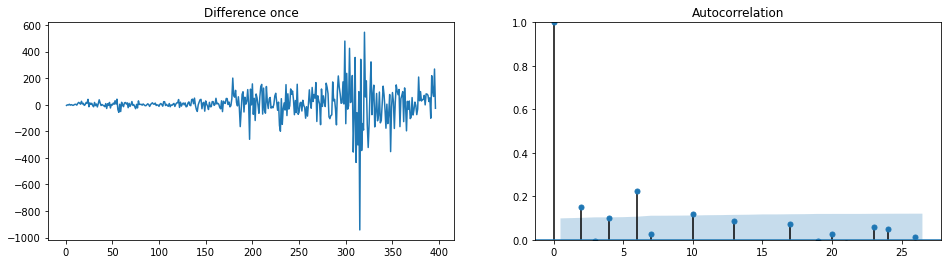

In [126]:
diff = df.Price.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

q=4

In [149]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.Price, order=(1,2,2))
result = model.fit(disp=0)

In [150]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                  395
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2408.022
Method:                       css-mle   S.D. of innovations            106.639
Date:                Thu, 07 Oct 2021   AIC                           4826.043
Time:                        15:31:59   BIC                           4845.938
Sample:                             2   HQIC                          4833.926
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0259      0.044      0.593      0.554      -0.060       0.112
ar.L1.D2.Price    -0.8262      0.078    -10.572      0.000      -0.979      -0.673
ma.L1.D2.Price    -0.2987      0.097

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00740918,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-897.11809838, -762.15042623, -627.18275408, -492.21508192,
        -357.24740977, -222.27973762,  -87.31206546,   47.65560669,
         182.62327884,  317.59095099,  452.55862315]),
 <a list of 395 Lists of Patches objects>)

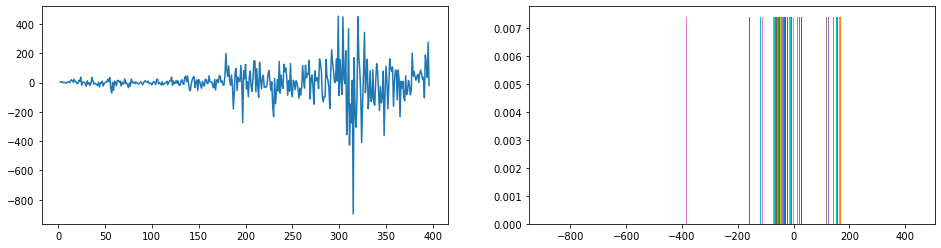

In [151]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(residuals)

ax2.hist(residuals, density=True)

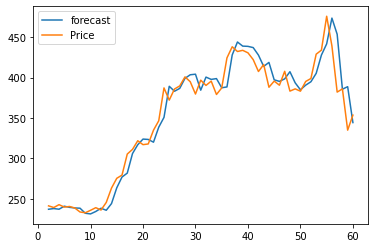

In [152]:
#actual vs predicted
result.plot_predict(
    start=2,
    end=60,
    dynamic=False,
);

In [153]:
result.forecast()

(array([3161.81995137]),
 array([106.63923053]),
 array([[2952.81090018, 3370.82900255]]))

so for aug 9 my model predicted the value "3161.82" and Ethereum's official price is "3162.93" therefore my model was able to predict the price with an accuracy of <95%.

In [73]:
df.tail()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
274,2021-10-02,47666.9,NaN,NaN,NaN,NaN,NaN
275,2021-10-03,48200.1,NaN,NaN,NaN,NaN,NaN
276,2021-10-04,49227.3,NaN,NaN,NaN,NaN,NaN
277,2021-10-05,51469.3,NaN,NaN,NaN,NaN,NaN
278,2021-10-06,55323.2,NaN,NaN,NaN,NaN,NaN


In [29]:
print('gpus available', len(tf.config.list_physical_devices('GPU')))

gpus available 0
